# FIRST ASSIGNMENT - BINARY CLASSIFICATION

Project Introduction

Write python code to compare the performance of three different classification methods. You can choose any three classification methods based on the following list:

- Decision Tree
- Random Forest
- SVM/kernel SVM
- KNN
- Naïve Bayes
- Logistic Regression

#### 1. Indicate the imported packages/libraries

In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB 
from scipy.special import expit 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from category_encoders import OrdinalEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.utils.validation import check_is_fitted 

#### 2. Load the dataset and print the data information 

In [2]:
data = pd.read_csv("dataset_assignment1.csv")

In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,featue9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   featue9   700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


#### 3. Understand the dataset  

In [5]:
# Examine the features
print("Features:", list(data.columns))

Features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'featue9', 'class']


In [6]:
# Check for missing data
print("Number of missing values:", data.isnull().sum().sum())

Number of missing values: 0


In [7]:
# Check for invalid data
print("Data description:")
print(data.describe())

Data description:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean     4.415714    3.131429    3.204286    2.804286    3.214286    3.557143   
std      2.814236    3.050343    2.970958    2.854153    2.213193    3.613026   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    6.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

         feature7    feature8     featue9       class  
count  700.000000  700.000000  700.000000  700.000000  
mean     3.437143    2.864286    1.588571    0.344286  
std      2.436676    3.052265    1.713995    0.475475  
min      1.000000    1.00000

In [8]:
for col in data.columns:
    print(col, data[col].unique())

feature1 [ 5  3  6  4  8  1  2  7 10  9]
feature2 [ 1  4  8 10  2  3  7  5  6  9]
feature3 [ 1  4  8 10  2  3  5  6  7  9]
feature4 [ 1  5  3  8 10  4  6  2  9  7]
feature5 [ 2  7  3  1  6  4  5  8 10  9]
feature6 [ 1 10  2  4  3  9  7  5  8  6]
feature7 [ 3  9  1  2  4  5  7  8  6 10]
feature8 [ 1  2  7  4  5  3 10  6  9  8]
featue9 [ 1  5  4  2  3  7 10  8  6]
class [0 1]


##### a. Print-out the number of samples for each class in the dataset 

In [9]:
data["class"].value_counts()

0    459
1    241
Name: class, dtype: int64

##### b. Plot some figures to visualize the dataset (e.g., histogram, etc.) 

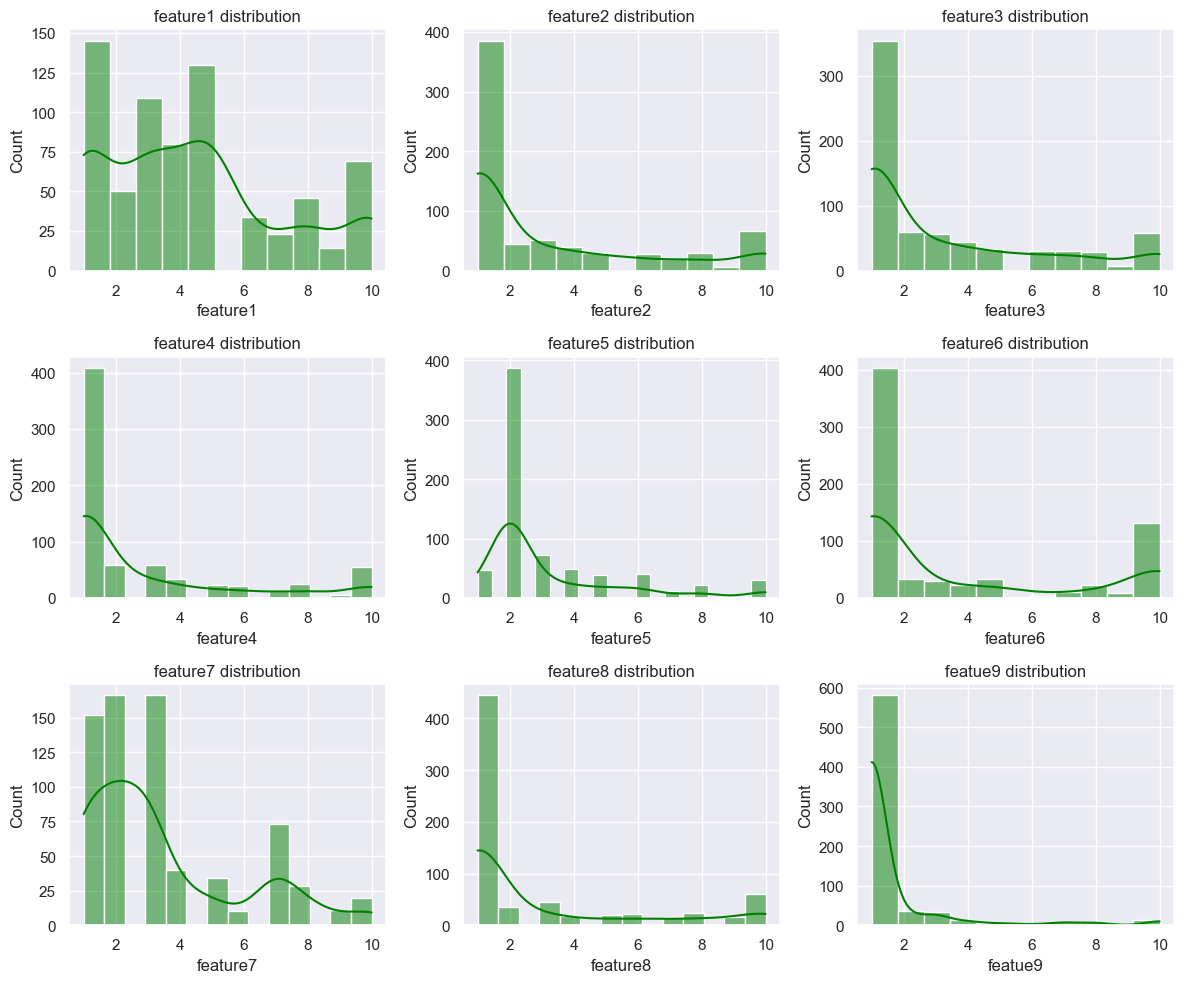

In [10]:
# Visualize all features
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axs = axs.flatten()

for i, feature in enumerate(data.columns[:-1]):
    sns.histplot(data[feature], kde=True, color='green', ax=axs[i])
    axs[i].set_title(f'{feature} distribution')

plt.tight_layout()
plt.show()

##### c. For each class, print-out the statistical description of features (e.g., the input variable x), such as mean, std, max and min values, etc. 

In [11]:
# Group the data by class
grouped_data = data.groupby('class')

# Loop through each group and print the statistical description of features
for name, group in grouped_data:
    print(f'Statistical description of features for class {name}:')
    print(group.drop(columns=['class']).describe())
    print()

Statistical description of features for class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8     featue9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  
2

##### Logistics regression

###### Explore

Since our model will be a type of linear model, we need to make sure there's no issue with multicollinearity in our dataset.

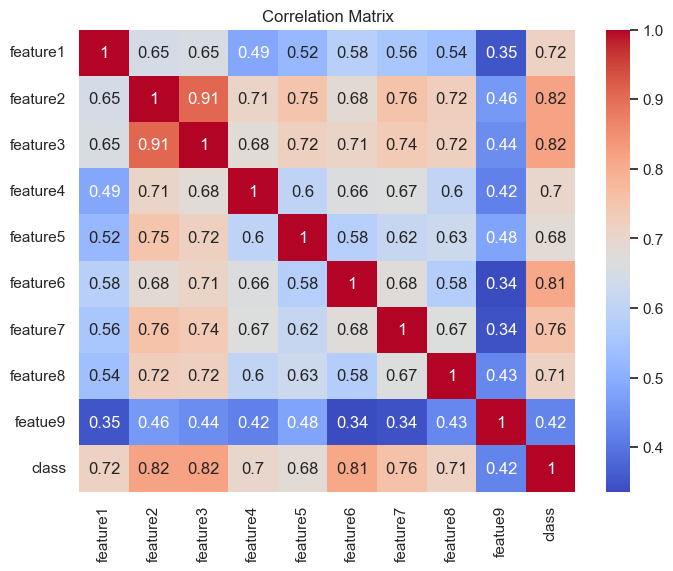

In [12]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
data["class"].corr(data["feature2"])
data["class"].corr(data["feature2"])

0.8180353542307545

feature2 and feature3 has a very high correlation of 91% so we need to drop one of each, and nee to conside the feature correlation with the class label. feature 3 has possitive correlation (0.819) with the class while feature2 has possitive correlation (0.818) with the class labe, so we drop the feature with the lowest correlation between the two feature.

Use seaborn to create a boxplot that shows the distributions of the higher correlated features for both groups in the respective class.

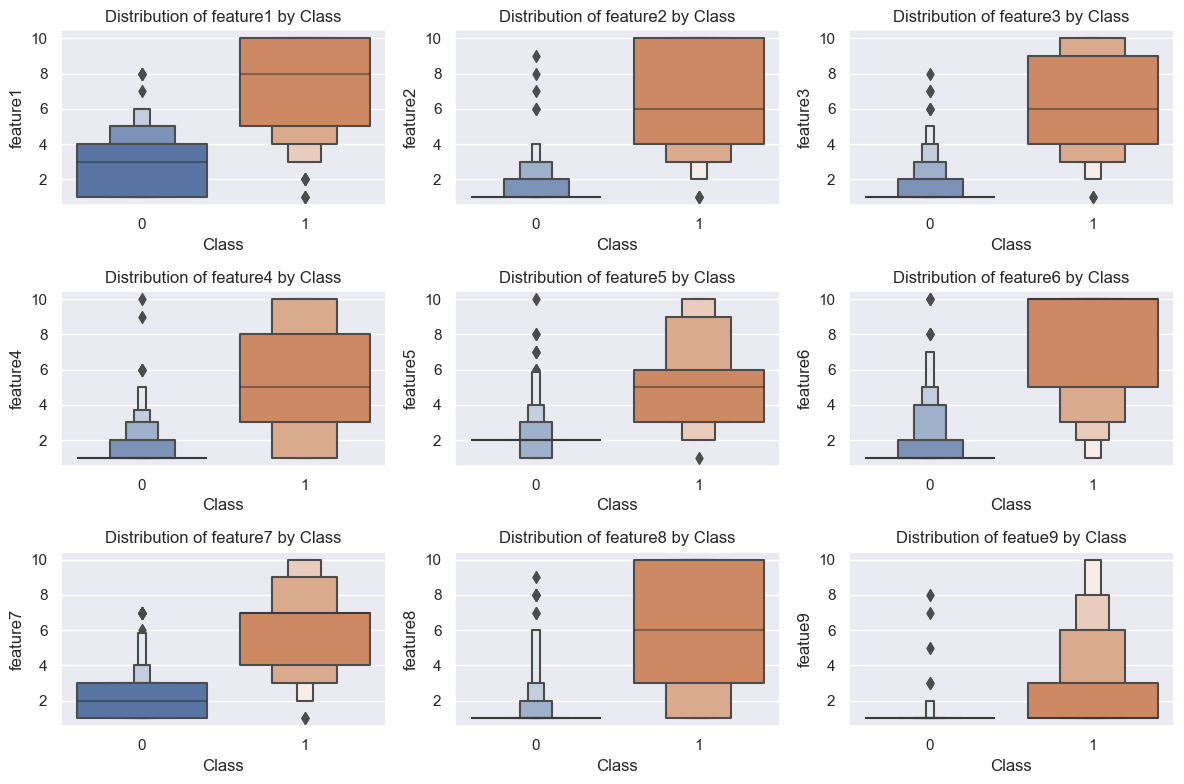

In [14]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Create boxplots for each feature and class combination
for i, feature in enumerate(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'featue9']):
    row = i // 3
    col = i % 3
    sns.boxenplot(x="class", y=feature, data=data, ax=axes[row, col])
    axes[row, col].set_xlabel("Class")
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"Distribution of {feature} by Class")

plt.tight_layout()
plt.show()


Before we build our model, let's see if we can identify any obvious differences between classes

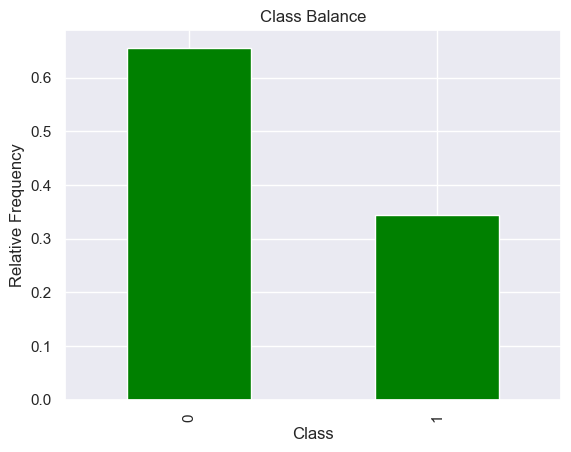

In [15]:
data["class"].value_counts(normalize=True).plot(
    kind="bar", 
    xlabel="Class",
    ylabel="Relative Frequency",
    color='green',
    title="Class Balance"
);

class 0 is our majority class and class 1 is the minority class

In [16]:
majority_class_prop, minority_class_prop = data["class"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.6557142857142857 0.3442857142857143


In [17]:
# Create pivot table
feature1_pivot = pd.pivot_table(
    data, index="feature1", values="class", aggfunc=np.mean
).sort_values(by="class")
feature1_pivot

,class
feature1,
1,0.020690
2,0.080000
3,0.110092
4,0.150000
5,0.346154
6,0.529412
8,0.913043
7,0.956522
9,1.000000


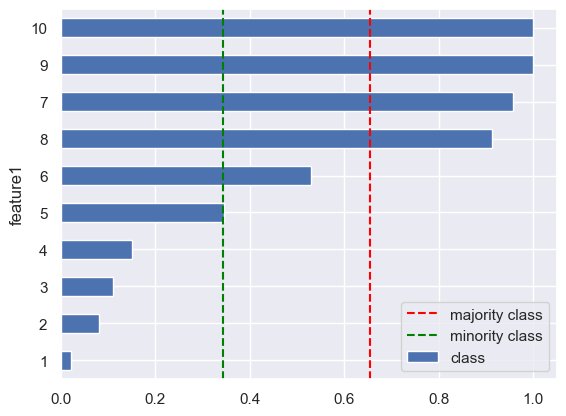

In [18]:
# Plot bar chart of `foundation_pivot`
feature1_pivot.plot(kind="barh")
plt.axvline(
    majority_class_prop, linestyle="--", color = "red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color = "green", label="minority class"
)
plt.legend(loc="lower right")

#### 4. Split data into a training dataset and a testing dataset (i.e., 80% v.s. 20

###### Split

In [19]:
# Split the dataset into input features (X) and target variable (y)
target = "class"
X = data.drop(columns=target)
y = data[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (560, 9)
y_train shape: (560,)
X_test shape: (140, 9)
y_test shape: (140,)


#### 5. For  each  classification  algorithm  you  chose,  please  complete  the  below  steps  in Python: 

###### Build Model

Baseline

In [21]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.65


Iterate

In [22]:
# Build model
model = make_pipeline(
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

Evaluate

In [23]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.97
Test Accuracy: 0.96


###### Communicate

In [24]:
model.predict(X_train)[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [25]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.98041828 0.01958172]
 [0.78337973 0.21662027]
 [0.99715157 0.00284843]
 [0.00878516 0.99121484]
 [0.98656718 0.01343282]]


In [26]:
importances = model.named_steps["logisticregression"].coef_[0]
features = X_train.columns

In [27]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios

feature2    0.981967
feature8    1.003065
feature5    1.118854
feature4    1.250377
featue9     1.415501
feature6    1.460560
feature7    1.493833
feature3    1.514471
feature1    1.727368
dtype: float64

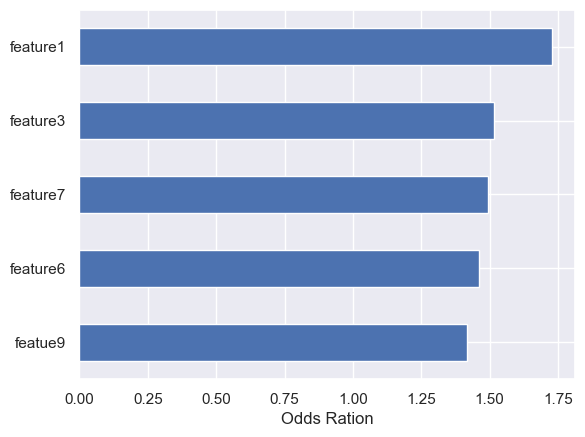

In [28]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")
plt.xlabel("Odds Ration");

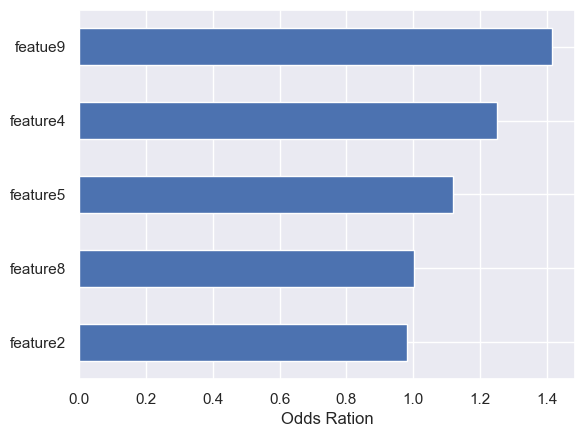

In [29]:
odds_ratios.head().plot(kind="barh")
plt.xlabel("Odds Ration");

Sure, I can train a model using any training dataset and use K-Fold Cross Validation to tune hyperparameters. Let's take the famous Iris dataset for this task. The Iris dataset contains information about three different species of Iris flowers, namely Setosa, Versicolor, and Virginica. Each sample in the dataset has four features: sepal length, sepal width, petal length, and petal width.

For this task, I will use the K-Nearest Neighbors (KNN) algorithm to classify the Iris flowers. KNN is a non-parametric and lazy learning algorithm, which means it does not make any assumptions about the distribution of data and does not have a fixed set of parameters to learn.

Here are the steps I will follow to train the KNN model using K-Fold Cross Validation:

Load the dataset and split it into features (X) and target (y) variables.
Standardize the features using StandardScaler from sklearn.preprocessing module.
Initialize the KNN classifier.
Define the hyperparameter grid for tuning.
Perform K-Fold Cross Validation with k = 5 using GridSearchCV from sklearn.model_selection module to find the best hyperparameters.
Train the KNN classifier with the best hyperparameters.
Test the model on the test set and report the accuracy score.
Let's implement the above steps in Python:

In [30]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Perform K-Fold Cross Validation with k = 5 using GridSearchCV
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_std, y_train)

# Train the KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'], 
                                 weights=knn_cv.best_params_['weights'])
best_knn.fit(X_train_std, y_train)

# Test the model on the test set and report the accuracy score
y_pred = best_knn.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Sure, I can also use logistic regression to classify the Iris flowers. Logistic regression is a parametric algorithm that models the probability of a binary or multi-class classification problem.

Here are the steps I will follow to train the logistic regression model using K-Fold Cross Validation:

Load the dataset and split it into features (X) and target (y) variables.
Standardize the features using StandardScaler from sklearn.preprocessing module.
Initialize the logistic regression classifier.
Define the hyperparameter grid for tuning.
Perform K-Fold Cross Validation with k = 5 using GridSearchCV from sklearn.model_selection module to find the best hyperparameters.
Train the logistic regression classifier with the best hyperparameters.
Test the model on the test set and report the accuracy score.
Let's implement the above steps in Python:

In [31]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize the logistic regression classifier
lr = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform K-Fold Cross Validation with k = 5 using GridSearchCV
lr_cv = GridSearchCV(lr, param_grid, cv=5)
lr_cv.fit(X_train_std, y_train)

# Train the logistic regression classifier with the best hyperparameters
best_lr = LogisticRegression(C=lr_cv.best_params_['C'], 
                              penalty=lr_cv.best_params_['penalty'], 
                              random_state=42)
best_lr.fit(X_train_std, y_train)

# Test the model on the test set and report the accuracy score
y_pred = best_lr.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [32]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize the logistic regression classifier
lr = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform K-Fold Cross Validation with k = 5 using GridSearchCV
lr_cv = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
lr_cv.fit(X_train_std, y_train)

# Train the logistic regression classifier with the best hyperparameters
best_lr = LogisticRegression(C=lr_cv.best_params_['C'], 
                              penalty=lr_cv.best_params_['penalty'], 
                              random_state=42)
best_lr.fit(X_train_std, y_train)

# Evaluate the model on the validation set
y_pred = best_lr.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

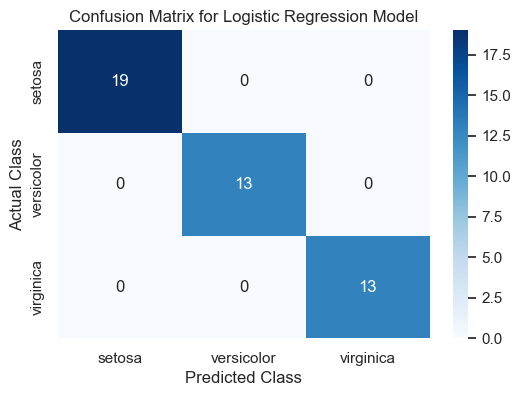

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [33]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train the logistic regression classifier with the best hyperparameters
best_lr = LogisticRegression(C=1, penalty='l2', random_state=42)
best_lr.fit(X_train_std, y_train)

# Evaluate the model on the testing set
y_pred = best_lr.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.set()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


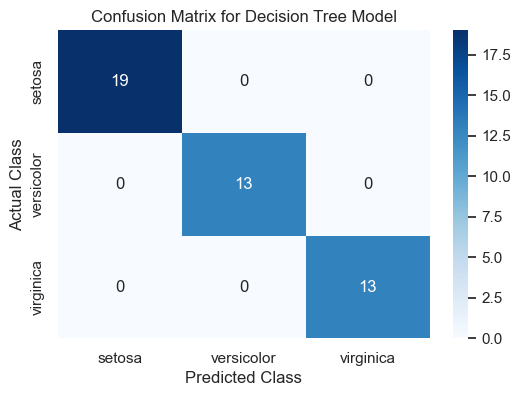

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [34]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier with K-Fold Cross Validation to find the best hyperparameters
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the decision tree classifier with the best hyperparameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.set()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


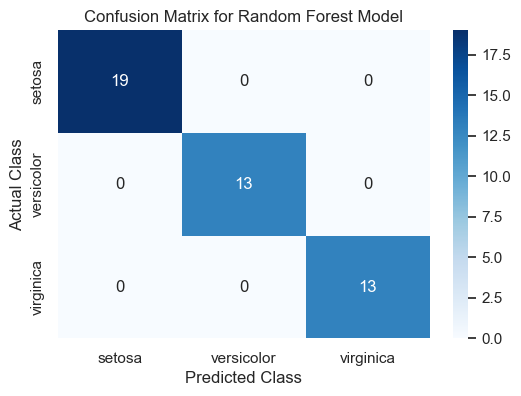

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [35]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the random forest classifier with K-Fold Cross Validation to find the best hyperparameters
param_grid = {'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the random forest classifier with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.set()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
